In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sklearn.naive_bayes as nb
from sklearn import linear_model
from sklearn.datasets import load_boston
from pandas import scatter_matrix
import os


# Introduction

In this assignment, you'll be analyzing movie reviews in an attempt to
determine whether movies are good or bad.  The file "reviews.csv",
contains reviews from the [Rotten Tomatoes](http://www.rottentomatoes.com) website.  I've also put a file "movies.dat" on Canvas that contains metadata for ~65,000 different movies

If you've never seen Rotten Tomatoes before, go spend a few minutes familiarizing yourself with the website.  It's a meta-review website that aggregates movie reviews from a large number of critics.  Note in particular the section on "Critic Reviews" at the bottom -- that's the content that has been scraped and put in the reviews.csv file.  Also note that each movie is given a quantitative score on the Tomatometer which is used to classify the movie as either Fresh or Rotten.

Your mission is to develop a classifier to determine whether a movie is Fresh or Rotten based on the contents of the reviews given to the movie.  As before, we'll start out with some exploratory data analysis.

# 1 Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  Begin by loading the datasets and dropping rows that have missing data, either missing review or missing fresh/rotten indicator.

In [2]:
#read dataframes
reviews=pd.read_csv("reviews.csv")
movies = np.fromfile('movies.dat')

#drop missing reviews or missing fresh/rottern indicccator
reviews.dropna(subset=['fresh','quote'],inplace=True)

# convert movies dataset into a dataframe
datContent = [i.strip().split('\t') for i in open("movies.dat").readlines()]
movies=pd.DataFrame(datContent)
header = movies.iloc[0]
movies = movies[1:]
movies=movies.rename(columns = header)

## 1.1 Basic features of the dataset

Answer the following questions by having your code directly print the
answers:

* How many unique reviews (quotes) are in the `reviews` dataset?
* How many unique reviewers (critics) are in the `reviews` dataset?
* How many unique movies are in the `reviews` dataset?
* How many unique movies are in the *`movies`* dataset?
* How many different publications have reviews in the `reviews` dataset?


In [3]:
# Unique reviews
print('Unique Reviews: ',reviews.quote.unique().shape[0])

#unique critics
print('Unique Critics: ',reviews.critic.unique().shape[0])

#unique titles
print('Unique Titles: ',reviews.title.unique().shape[0])

#unique publications
print('Unique Publications: ',reviews.publication.unique().shape[0])

#unique titles in movies dataset
print('Unique Titles in Movies Dataset:',movies.title.unique().shape[0])
#print('Unique reviews: ',reviews.quote.unique().shape[0])


Unique Reviews:  12836
Unique Critics:  541
Unique Titles:  1720
Unique Publications:  64
Unique Titles in Movies Dataset: 9405


## 1.2 Number of reviews per reviewer

Using the `reviews` dataset, create a histogram showing the distribution of the number of reviews per reviewer.  Create the bin width (x-axis) to be 1 unit wide, and the range of the axis to be from 0 to 30.  Scale the y-axis to show the logarithm of (count of) the number of reviews.  Label your axes and make your histogram look professional.

Does the distribution look normal?  Is it what you expect?

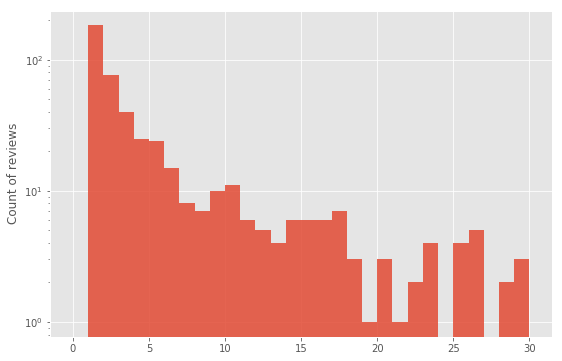

In [4]:
# plot distribution of the number of reviews per reviewer
plt.style.use('ggplot')
plt.figure(figsize=(9,6))
plt.hist(reviews.critic.value_counts(),log=True,range=(0,30),bins=30,alpha=0.85)
plt.ylabel('Count of reviews')
plt.show()

• Here we expected that the distribution would not be normal since  there would not be too many movie critics who would watch every movie and review them.

• The publications generally hire multiple movie critics and thus the the frequency of reviews per reviewer would fall since the reviews get divided amongst the colleagues. And thus the number of people who review somewhere between frequently and occassionally would be a higher number of reviewers who are tasked by their respective publications to watch a majority of the movies and review them.

## 1.3 Take a closer look of a few reviews

Find the 30 critics with the most reviews, and list their names in a table along with (a) the name of the publication they work for, (b) the date of their first review, and (c) the date of their last review

*hint: use the groupby function*

In [5]:
#group reviews by critics and publications
top_reviews = reviews.groupby([reviews.critic,reviews.publication])

#get first and last review date
top30_df = top_reviews.agg({'quote':np.count_nonzero,'review_date' : [np.min, np.max]})

#get top 30 most reviewers
top30_df = top30_df.sort_values([('quote', 'count_nonzero')], ascending=False)[:30]
top30_df.drop('quote', axis=1)

review_date  \
                                                           amin   
critic             publication                                    
Roger Ebert        Chicago Sun-Times        2000-01-01 00:00:00   
James Berardinelli ReelViews                1800-01-01 00:00:00   
Janet Maslin       New York Times           2000-01-01 00:00:00   
Variety Staff      Variety                  2001-02-13 00:00:00   
Jonathan Rosenbaum Chicago Reader           1988-07-11 00:00:00   
Desson Thomson     Washington Post          2000-01-01 00:00:00   
Geoff Andrew       Time Out                 2005-08-11 00:00:00   
Dave Kehr          Chicago Reader           2000-01-01 00:00:00   
Kenneth Turan      Los Angeles Times        2000-01-01 00:00:00   
Mick LaSalle       San Francisco Chronicle  2000-01-01 00:00:00   
Owen Gleiberman    Entertainment Weekly     1800-01-01 00:00:00   
Rita Kempley       Washington Post          2000-01-01 00:00:00   
Todd McCarthy      Variety                  2000-01-01 00:00:00   
Joe Baltake        Sacramento Bee           2000-01-01 00:00:00   
Vincent Canby      New York Times           2000-01-01 00:00:00   
Hal Hinson         Washington Post          2000-01-01 00:00:00   
Susan Stark        Detroit News             2000-01-01 00:00:00   
Stephen Holden     New York Times           2000-01-01 00:00:00   
Derek Adams        Time Out                 2006-01-26 00:00:00   
Kevin Thomas       Los Angeles Times        2000-01-01 00:00:00   
Peter Stack        San Francisco Chronicle  2000-01-01 00:00:00   
Bosley Crowther    New York Times           2000-01-01 00:00:00   
Rick Groen         Globe and Mail           2002-03-19 00:00:00   
Edward Guthmann    San Francisco Chronicle  2000-01-01 00:00:00   
Lisa Schwarzbaum   Entertainment Weekly     1979-01-01 00:00:00   
Liam Lacey         Globe and Mail           2001-08-24 00:00:00   
Emanuel Levy       Variety                  2000-01-01 00:00:00   
Richard Schickel   TIME Magazine            2007-06-27 00:00:00   
Richard Corliss    TIME Magazine            2003-12-16 00:00:00   
Jay Boyar          Orlando Sentinel         2002-01-03 00:00:00   

                                                                 
                                                           amax  
critic             publication                                   
Roger Ebert        Chicago Sun-Times        2013-06-11 00:00:00  
James Berardinelli ReelViews                2012-02-07 00:00:00  
Janet Maslin       New York Times           2010-09-07 00:00:00  
Variety Staff      Variety                  2012-08-15 00:00:00  
Jonathan Rosenbaum Chicago Reader           2013-10-22 00:00:00  
Desson Thomson     Washington Post          2012-10-08 00:00:00  
Geoff Andrew       Time Out                 2012-04-05 00:00:00  
Dave Kehr          Chicago Reader           2013-11-06 00:00:00  
Kenneth Turan      Los Angeles Times        2013-10-05 00:00:00  
Mick LaSalle       San Francisco Chronicle  2009-11-25 00:00:00  
Owen Gleiberman    Entertainment Weekly     2011-09-07 00:00:00  
Rita Kempley       Washington Post          2013-11-02 00:00:00  
Todd McCarthy      Variety                  2012-10-09 00:00:00  
Joe Baltake        Sacramento Bee           2004-12-22 00:00:00  
Vincent Canby      New York Times           2013-07-29 00:00:00  
Hal Hinson         Washington Post          2013-06-26 00:00:00  
Susan Stark        Detroit News             2002-10-25 00:00:00  
Stephen Holden     New York Times           2009-02-06 00:00:00  
Derek Adams        Time Out                 2009-10-04 00:00:00  
Kevin Thomas       Los Angeles Times        2013-11-02 00:00:00  
Peter Stack        San Francisco Chronicle  2002-06-18 00:00:00  
Bosley Crowther    New York Times           2008-05-06 00:00:00  
Rick Groen         Globe and Mail           2009-08-14 00:00:00  
Edward Guthmann    San Francisco Chronicle  2003-04-04 00:00:00  
Lisa Schwarzbaum   Entertainment Weekly     2012-08-15 00:

## 1.4 Ratings over time

Using the `movies` dataset, create a plot that shows how the average rating per movie (rtAllCriticsRating) has evolved over time.  Do this by creating a scatterplot where the x-axis is the year in which the movie was released and the y-axis is rtAllCriticsRating.  Drop movies with 0 or unknown values to avoid biasing your results.  Then, create a scatterplot that has one <year,rating> point for each remaining movie, and pick an appropriate size/color/transparency for these points to ensure that the graph looks professional.  In other words, do not simply use the default settings, as this will produce a dense mess of dots that will be hard to interpret.  Finally, overlay on this scatterplot a line graph in red showing how the average movie rating (the average of rtAllCriticsRating across all movies in a year) has changed over time.  Do you notice a trend?  What do you think it means?

In [6]:
#remove garbage data from dataset
movies=movies[movies.rtAllCriticsRating!='\\N']
movies=movies[movies.rtAllCriticsRating!='0']

In [7]:
#caluclate mean movie rating by year
movies.rtAllCriticsRating=pd.to_numeric(movies.rtAllCriticsRating)
mean_rate=movies[['rtAllCriticsRating','year']].groupby(['year']).mean().reset_index()

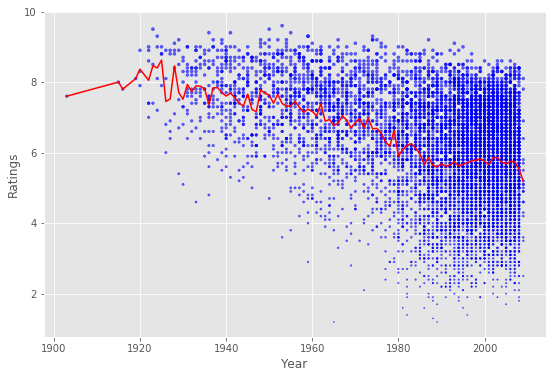

In [8]:
#plot scatterplot of rating by year
plt.figure(figsize=(9,6))
plt.scatter(movies.year,movies.rtAllCriticsRating,alpha=0.6,color='blue',s=movies.rtAllCriticsRating)
plt.plot(mean_rate.year,mean_rate.rtAllCriticsRating,color='red')
plt.xlabel('Year')
plt.ylabel('Ratings')
plt.show()

• Here we see an obvious trend as to a downward trend in the ratings of the movies as the movie era progresses.

• Here we se that the number of movies to be released keeps increasing with the years and thus the quality of the movies also tends to be on both sides of the spectrum. Along with that as and when new movies release, with every good movie the bar for the movies is set and thus the movies that do not meet those bars tend to get lower rating.

• Thus we see such a wide range of ratings in the 21st century movies.
 

# Part 2: Naive Bayes

Now it gets fun!  You are going to use a Naive Bayes classifier to build a prediction model for whether a review is fresh or rotten, depending on the text of the review. 

## 2.0 Using CountVectorizer

One thing that may help you in the following problems is the _CountVectorizer_ object in Scikit-learn.  This will help you convert your raw text fields into "bag of words" vectors, i.e. a data structure that tells you how many times a particular word appears in the text.  (Note: the order of wordss is not preserved in the bag).   Here's a simple example, make sure you understand what's going on!

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = ["Next morning when I awakened I found Jem and Dill in the back yard deep in conversation.", "When I joined them, as usual they said go away.", "Will not.", "This yard's as much mine as it is your, Jem Finch.", "I got just as much right to play in it as you have."]
# Harper Lee "To Kill a Mockingbrid"
#print "Original text:\n", '\n'.join(sentences)

vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(reviews.quote)
# `fit` builds the vocabulary
x = vectorizer.transform(reviews.quote).toarray()
# `transform` converts text to a bag of words
print("Transformed text vector:\n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x
#print("Words for each feature:")
#print(vectorizer.get_feature_names())

Transformed text vector:
 [[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


## 2.1 Create your X input and Y output

Using the `reviews` dataframe, compute a pair of numerical X, Y arrays where:
    
 * X is a `(nreview, nwords)` array. Each row is the bag-of-words representation for a single review.  This will be the *input* (fetaures) of your model.
 * Y is a `nreview`-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired *output* (target) from your model.
 
 Make sure to remove items with no review text

Feel free to use the _make\_xy_ function below to achieve it, but you can also create your own parser.

In [10]:
"""
Function
--------
make_xy

Build a bag-of-words training set for the review data

Parameters
-----------
reviews : Pandas DataFrame
    The review data from above
    
vectorizer : CountVectorizer object (optional)
    A CountVectorizer object to use. If None,
    then create and fit a new CountVectorizer.
    Otherwise, re-fit the provided CountVectorizer
    using the reviews data
    
Returns
-------
X : numpy array (dims: nreview, nwords)
    Bag-of-words representation for each review.
Y : numpy array (dims: nreview)
    1/0 array. 1 = fresh review, 0 = rotten review

Examples
--------
X, Y = make_xy(reviews)
"""
def make_xy(critics, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    Y = (critics.fresh == 'fresh').values.astype(np.int)
    return X, Y

X,y = make_xy(reviews)

## 2.2 Test-Train split

Next, randomly split the data into two groups: a training (75%) set and a validation set (25%).  You can do this manually, as you have done earlier, but I recommend to use `train_test_split` in 'sklearn.model_selection'.

In [11]:
# test X and y into train and test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

## 2.3 Naive Bayes with `MultinomialNB`
Use the training set to train a Naive Bayes classifier using the `MultinomialNB` from 'sklearn'.  Play with _MultinomialNB_ parameters.  Report the accuracy of this model on both the training and testing data.  What do you observe?  Interpret these results!

*Hint: This shouldn't take more than 5-10 lines of code to accomplish*



In [12]:
import sklearn.naive_bayes as nb

#fit and train the dataset on Naive Bayes classifier
Mult_NB=nb.MultinomialNB(alpha=0.065,fit_prior=True)
Mult_NB.fit(X_train,y_train)
print("The accuracy for test data:",Mult_NB.score(X_test,y_test))
print("The accuracy for train data:",Mult_NB.score(X_train,y_train))



The accuracy for test data: 0.761083011009
The accuracy for train data: 0.95436960619


• After playing around with some MultinomialNB parameters, this was the best accuracy reportable for the training and the testing dataset. Here we observe a good training accuracy of around 0.761 or 76.1% and and a decent accuracy of abount 0.954 that is 95.4 percent.
 
• This difference in the accuracy is due to the fact that the model was trained and fitted using the training data and thus it can correctly predict a higher number of cases as compared the the data from the test dataset, which would be completely new for the model.

# 3 Evaluation

## 3.1 Estimate the likelihood of your data

Calculate log-likelihood of a fitted model.  Log-likelihood is a way to assess the performance of your model.  Remeber -- likelihood is more-or-less the probability to observe your data (including your target).  Below is an example function that calculates the log-likelihood of an estimated model using `fitted_model.predict_logproba`.  You may use this function, or write your own.  

In [14]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 

The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews.

Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""
def log_likelihood(model, x, y):
    prob = model.predict_log_proba(x)
    # returns Nx2 array.  Columns are log(Pr(y == 0|x)), log(Pr(y==1|x))
    ll = prob[y == 0, 0].sum() + prob[y == 1, 1].sum()
    return ll

#print log likelihood of training and testing dataset
print('Log-Linkelihood of training dataset',log_likelihood(Mult_NB,X_train,y_train))
print('Log-Linkelihood of testing dataset',log_likelihood(Mult_NB,X_test,y_test))



Log-Linkelihood of training dataset -1127.7740909
Log-Linkelihood of testing dataset -2864.94000225


## 3.2 Cross-Validation

Why do we care about the log-likelihood of our data?  You guessed it: Cross-Validation.

Our classifier has a few hyperparameters. The two most important are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The `alpha` keyword in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

We are going to use cross-validation to tune these hyperparameters.  The objective function we want to maximize is the log-likelihood of our data.  Fill in the remaining code in this block, to loop over many values of `alpha` and `min_df` to determine
which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, `sklearn.model_selection.cross_val_score`, that might save you a lot of time here...*

In [15]:

#the grid of parameters to search over
import warnings
warnings.filterwarnings('ignore')

#cross validation across different alphas and min_dfs
def cross_val():
    
    #alpha and min_df combinations
    alphas = [0, .1, 1, 5, 10, 50]
    min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
    score={}
    df=[]
    
    #loop over alpha and min_df
    for min_df in min_dfs:
        #tokenize words and create features and target values
        vectorizer = CountVectorizer(min_df=min_df)
        X,y = make_xy(reviews,vectorizer)
        
        for alpha in alphas:
            
            #create a MNB model and calculate log likelihood for each
            MNB=nb.MultinomialNB(alpha=alpha)
            MNB_scores=cross_val_score(estimator=MNB,X=X,y=y,scoring=log_likelihood,cv=10)
            score={'alpha':alpha,'min_df':min_df,'scores':np.mean(MNB_scores)}
            df.append(score)
    return(df)
      

cross_val_result=cross_val()

#get the parameters with highest to loweest log likelihood
cross_val=pd.DataFrame(cross_val_result).sort_values(by='scores',ascending=False)
print(cross_val)

            


    alpha   min_df       scores
15    5.0  0.00100  -733.146149
16   10.0  0.00100  -734.195724
14    1.0  0.00100  -764.249454
8     1.0  0.00010  -772.736505
2     1.0  0.00001  -774.628471
13    0.1  0.00100  -796.719460
22   10.0  0.01000  -834.134550
21    5.0  0.01000  -835.345067
20    1.0  0.01000  -836.824082
19    0.1  0.01000  -837.235270
18    0.0  0.01000  -837.282975
23   50.0  0.01000  -837.849515
9     5.0  0.00010  -844.338434
28   10.0  0.10000  -874.319335
27    5.0  0.10000  -874.322440
26    1.0  0.10000  -874.326425
25    0.1  0.10000  -874.327511
24    0.0  0.10000  -874.327636
29   50.0  0.10000  -874.360454
17   50.0  0.00100 -1102.179284
7     0.1  0.00010 -1120.080947
1     0.1  0.00001 -1122.043182
3     5.0  0.00001 -1147.652759
10   10.0  0.00010 -1189.092527
4    10.0  0.00001 -1642.209644
11   50.0  0.00010 -2054.284500
5    50.0  0.00001 -2304.783390
0     0.0  0.00001          NaN
6     0.0  0.00010          NaN
12    0.0  0.00100          NaN


• Here we see that the larget log likelihood of -733.14 corresponds to the parameter of alpha=5 and min_df-0.001. This this would be the best setting in which the model's cross validated log likelihood is maximum.

## 3.3 Putting it together

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the steps in 2.1-2.3 to train a final classifier with these parameters and re-evaluate the accuracy.  Discuss the various ways in which Cross-Validation has affected the model. Is the new model more or less accurate? Is overfitting better or worse?

In [16]:
#tokenize data and create feature and target variables
vectorizer = CountVectorizer(min_df=cross_val.min_df.iloc[0])
X,y = make_xy(reviews)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

#fit the data into the Naive Bayes Classifier
Mult_NB=nb.MultinomialNB(alpha=cross_val.alpha.iloc[0],fit_prior=True)
Mult_NB.fit(X_train,y_train)

#report the accuracy fot the data
print("The accuracy for test data:",Mult_NB.score(X_test,y_test))
print("The accuracy for train data:",Mult_NB.score(X_train,y_train))

The accuracy for test data: 0.682237429337
The accuracy for train data: 0.742386667989



• Here we can a range of cross validation values and the best value with the highest log likelihood give us a training accuract of 74% and a test accuracy fo 68%.

• Here we see that we definitely generate a large number of log likelihood values, but we did not see an increase in the accuracy of the model, but rather we saw a decrease in the accuracy. The accuracy decreased both in the trainin and the testing data, and thus we could say that the paramters did not allow us to fir the data very well.

### 3.4 (Extra Credit)

What happens if you tried this again using a function besides the log-likelihood -- for example, the classification accuracy?  Interpret these results

In [17]:
# Enter your code here


## 3.5 Interpretation

What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [18]:
# make features function that returns the feature names
def make_xy_features(critics,min_df=1,vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=min_df)
    X = vectorizer.fit_transform(critics.quote)
    X = X.tocsc()  # some versions of sklearn return COO format
    Y = (critics.fresh == 'fresh').values.astype(np.int)
    return X, Y, vectorizer.get_feature_names()



X,y,features = make_xy_features(reviews)

In [19]:
#create identity matrix of dimensions corresponding to number of features
X_features=np.identity(len(features))

#split into train test and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)
Mult_NB=nb.MultinomialNB(alpha=cross_val.alpha.iloc[0],fit_prior=True)
Mult_NB.fit(X_train,y_train)

#predict fresh and rotten probabilities using the identity matrix of individual features
feature_prob=Mult_NB.predict_proba(X_features)


In [20]:

#create dataframe of the probabilities of inidivdual features
df = pd.DataFrame(feature_prob)

#get the top 10 words that best predict rotten reviews
rotten_df=df.sort_values(by=0,ascending=False)
rotten_prob=rotten_df[0].head(10)
rotten = [features[i] for i in list(rotten_df.index.values[0:10])]

#get the top 10 words that best predict fresh reviews
fresh_df = df.sort_values(by=1,ascending=False)
fresh_prob=fresh_df[0].head(10)
fresh = [features[i] for i in list(fresh_df.index.values[0:10])]


In [21]:
#get the probabilities of the top 10 words in fresh reviews
print(fresh_df[1].head(10))
print(fresh)

#get the probabilities of the top 10 words in rotten reviews
print(rotten_df[0].head(10))
print(rotten)

11327    0.919976
18934    0.914114
4755     0.903338
20610    0.897065
13397    0.889471
1700     0.884657
13971    0.879061
10315    0.878516
277      0.875141
6110     0.873777
Name: 1, dtype: float64
['masterpiece', 'touching', 'delight', 'witty', 'perfect', 'beautiful', 'powerful', 'kubrick', 'absorbing', 'entertaining']
19558    0.868865
10378    0.800250
13786    0.779930
19589    0.755007
5138     0.747049
5606     0.740301
5136     0.729476
18806    0.723718
7217     0.719741
6599     0.713393
Name: 0, dtype: float64
['unfortunately', 'lame', 'pointless', 'uninspired', 'disappointment', 'dull', 'disappointing', 'tiresome', 'forced', 'fails']


### 3.6 Error Analysis

One of the best sources for inspiration when trying to improve a model is to look at examples where the model performs poorly.  Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.

What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? In your answer, report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".

In [22]:
#create new X,y using count Vectorizer
vectorizer = CountVectorizer()
X,y = make_xy(reviews,vectorizer)

#fit the entire dataset using Naive Bayes classifier
Mult_NB=nb.MultinomialNB(alpha=cross_val.alpha.iloc[0],fit_prior=True)
Mult_NB.fit(X,y)

#predict reviews based on the training data along with the prediction probabilty
y_pred=Mult_NB.predict(X)
pred_prob=Mult_NB.predict_proba(X)

#create a dataframe of the predicted probabilties
pred_df = pd.DataFrame(pred_prob)

In [23]:
#create a dataframe having wrong predictions
rotten_missed_df=pred_df[y_pred!=y]

#get 5 wrong rotten reviews with highest prediction probabilities
rotten_missed_df.sort_values(by=0,ascending=False,inplace=True)
rotten_missed=list(rotten_missed_df.index.values[0:5])

#print the top probabilities and corresponding wrong rotten reviews
print(rotten_missed_df.head(5))
reviews.iloc[rotten_missed]

              0         1
13261  0.945234  0.054766
1715   0.927304  0.072696
9287   0.866794  0.133206
1544   0.862353  0.137647
231    0.845434  0.154566


,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
13261,Peter Stack,fresh,134983,http://www.sfgate.com/cgi-bin/article.cgi?file...,San Francisco Chronicle,"Supernova, though predictable, isn't half bad.",2000-01-01 00:00:00,15140,Supernova
1715,Michael Sragow,fresh,110475,http://www.newyorker.com/arts/reviews/film/the...,New Yorker,The gangland plot is flimsy (bad guy Peter Gre...,2013-04-12 00:00:00,11568,The Mask
9287,Rita Kempley,fresh,104952,http://www.washingtonpost.com/wp-srv/style/lon...,Washington Post,Weighed down by a dull setup featuring Ralph '...,2000-01-01 00:00:00,13047,My Cousin Vinny
1544,Eve Zibart,fresh,112435,http://www.washingtonpost.com/wp-srv/style/lon...,Washington Post,"Though the script is predictable, it's not too...",2000-01-01 00:00:00,11628,The Baby-Sitters Club
231,James Berardinelli,fresh,112818,http://www.reelviews.net/php_review_template.p...,ReelViews,Dead Man Walking could easily be manipulative ...,2000-01-01 00:00:00,16611,Dead Man Walking


In [24]:
#create a dataframe having wrong predictions
fresh_missed_df=pred_df[y_pred!=y]

#get 5 wrong fresh reviews with highest prediction probabilities
fresh_missed_df.sort_values(by=1,ascending=False,inplace=True)
fresh_missed=list(rotten_missed_df.index.values[0:5])

#print the top probabilities and corresponding wrong fresh reviews
print(rotten_missed_df.head(5))
reviews.iloc[rotten_missed]

              0         1
13261  0.945234  0.054766
1715   0.927304  0.072696
9287   0.866794  0.133206
1544   0.862353  0.137647
231    0.845434  0.154566


,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
13261,Peter Stack,fresh,134983,http://www.sfgate.com/cgi-bin/article.cgi?file...,San Francisco Chronicle,"Supernova, though predictable, isn't half bad.",2000-01-01 00:00:00,15140,Supernova
1715,Michael Sragow,fresh,110475,http://www.newyorker.com/arts/reviews/film/the...,New Yorker,The gangland plot is flimsy (bad guy Peter Gre...,2013-04-12 00:00:00,11568,The Mask
9287,Rita Kempley,fresh,104952,http://www.washingtonpost.com/wp-srv/style/lon...,Washington Post,Weighed down by a dull setup featuring Ralph '...,2000-01-01 00:00:00,13047,My Cousin Vinny
1544,Eve Zibart,fresh,112435,http://www.washingtonpost.com/wp-srv/style/lon...,Washington Post,"Though the script is predictable, it's not too...",2000-01-01 00:00:00,11628,The Baby-Sitters Club
231,James Berardinelli,fresh,112818,http://www.reelviews.net/php_review_template.p...,ReelViews,Dead Man Walking could easily be manipulative ...,2000-01-01 00:00:00,16611,Dead Man Walking



• Here we notice that the mis-prediction is mainly because of the words that are used to describe the fresh movie reviews are being used in a negative conststuct, and our model is not sophiticated enough to comprehend bi-grams, tri-grams and ngram structure, and the saame happens in a reverse manner in case of the mis-classified rotten tweets. The reviewers also rely heavily on sarcastic reviews which would easily be mis-classified as fresh.

• Thus we can say that since each word are taken independently it violated the rules of language, since the same word can be used in many different context which again depends on the other features of the sentence and not on the ucrrent feature alone. THis leads the Naive Bayes algorithm to be justified the tag Naive.

In [25]:
#create a vectorizer with the new review
review=reviews.quote
review.append(pd.Series('This movie is not remarkable, touching, or superb in any way'))
vectorizer = CountVectorizer()
X_r = vectorizer.fit_transform(review)
X_r = X_r.tocsc()  # some versions of sklearn return COO format

#predict the freshness and probability of new review
print("Report your classifier's Freshness probability for the review: \"This movie is not remarkable, touching, or superb in any way.\"")
print('Predict whether the movie is fresh or rotten',Mult_NB.predict(X_r[-1]))
print('Predict the probabilities of the freshnes of the review',Mult_NB.predict_proba(X_r[-1]))

Report your classifier's Freshness probability for the review: "This movie is not remarkable, touching, or superb in any way."
Predict whether the movie is fresh or rotten [1]
Predict the probabilities of the freshnes of the review [[ 0.38338587  0.61661413]]


## Part 4: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [26]:
#Load Boston Dataset
bdata = load_boston()
bdata.df=pd.DataFrame(bdata.data)
bdata.target_df=pd.DataFrame(bdata.target)
bdata.target_df
bdata.df=pd.concat([bdata.df,bdata.target_df], axis=1)

#rename dataframe columns
bdata_names=np.append(bdata.feature_names,"Target")
bdata.df.columns=list(bdata_names)

### 4.1 Remember the last problem set?

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  If you didn't get full credit for this on the first problem set, get full credit this time!

Then, just as you did on the previous problem set, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

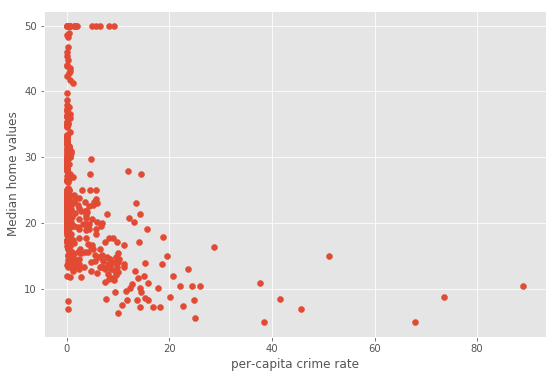

In [27]:
# Create CRIM vs MEDV scatterplot
plt.figure(figsize=(9,6))
plt.scatter(bdata.df.CRIM,bdata.df.Target)
plt.xlabel('per-capita crime rate')
plt.ylabel('Median home values')
plt.show()

In [28]:
#function to calculate rmse
def compute_rmse(predictions,yvalues):
    return np.sqrt(np.sum(np.multiply(yvalues-predictions,yvalues-predictions))/predictions.size)

In [29]:
y=bdata.df.pop('Target')
X_train, X_test, y_train, y_test = train_test_split(bdata.df, y, test_size=0.34, random_state=5)
lm=linear_model.LinearRegression()
lm.fit(X_train.RM.reshape(X_train.shape[0],1),y_train.reshape(y_train.shape[0],1))
y_pred=lm.intercept_+X_test.RM.reshape(X_test.shape[0],1)*lm.coef_
print("RMSE:",compute_rmse(y_pred,y_test.reshape(y_test.shape[0],1)))

RMSE: 7.12181405083


### 4.2 So many scatterplots!

Choose 8 out of the of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

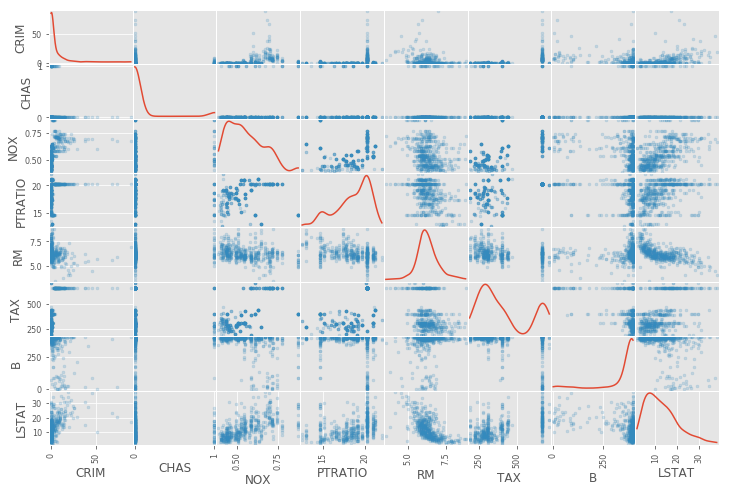

In [30]:
#create a scatterplot matrix of 8 features
scatter_matrix(bdata.df[['CRIM','CHAS','NOX','PTRATIO','RM','TAX','B','LSTAT']], alpha=0.2, figsize=(12, 8), diagonal='kde')
plt.show()

### 4.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

Explained Variance Ratio:
 [  8.14234223e-01   1.54185174e-01   2.16071490e-02   7.20530037e-03
   1.31125265e-03   6.85146318e-04   4.15483566e-04   2.28019376e-04
   9.08919743e-05   2.94923280e-05   6.28553495e-06   1.50523721e-06]
Explained Variance:
 [  3.03570771e+04   5.74848254e+03   8.05578873e+02   2.68635060e+02
   4.88874047e+01   2.55442955e+01   1.54904649e+01   8.50124153e+00
   3.38872354e+00   1.09956183e+00   2.34343465e-01   5.61197267e-02]


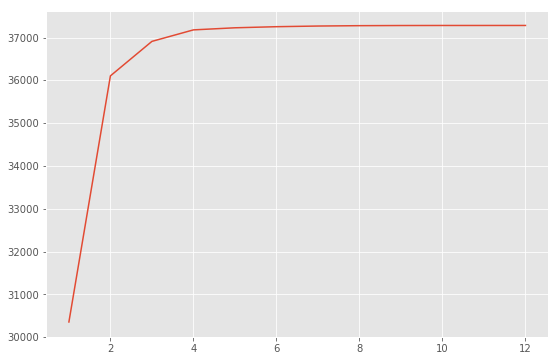

In [31]:
# create a PCA of the first 12 principal components
pca = PCA(n_components=12)
pca.fit(X_train)

#print Explained variance Ratio and Explained Variance 
print("Explained Variance Ratio:\n",pca.explained_variance_ratio_)
print("Explained Variance:\n",pca.explained_variance_)

#plot the explained variance of the 12 components
plt.figure(figsize=(9,6))
plt.plot(range(1,13),np.cumsum(pca.explained_variance_))
plt.show()

• Here we can see that the variance that i explained by the components keeps on increasing as the number of components increases.

• And the variance of the model can be explained very well by including just around 6 dimensions, as compared to 12 dimensions, all 5 of which explains the maximum variance.

### 4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

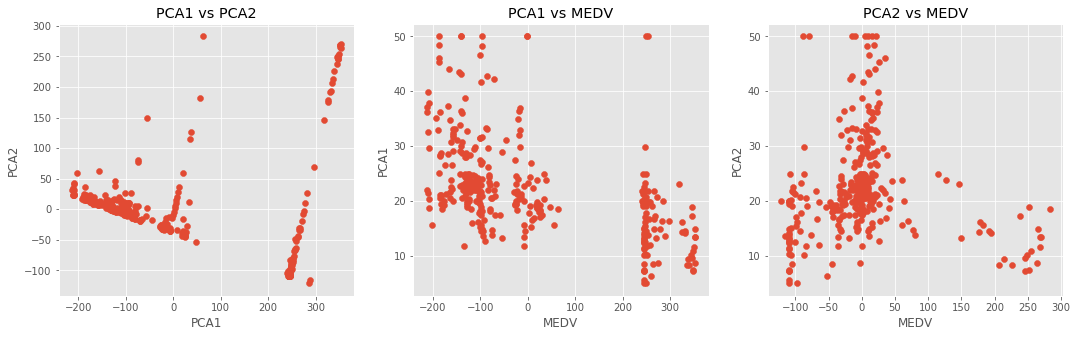

In [32]:
pca = PCA(n_components=2)
PCA_fit=pca.fit_transform(X_train)
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(18,5))
axes[0].scatter(PCA_fit[:,0],PCA_fit[:,1])
axes[0].set_title('PCA1 vs PCA2')
axes[0].set_ylabel('PCA2')
axes[0].set_xlabel('PCA1')


axes[1].scatter(PCA_fit[:,0],y_train)
axes[1].set_title('PCA1 vs MEDV')
axes[1].set_ylabel('PCA1')
axes[1].set_xlabel('MEDV')

axes[2].scatter(PCA_fit[:,1],y_train)
axes[2].set_title('PCA2 vs MEDV')
axes[2].set_ylabel('PCA2')
axes[2].set_xlabel('MEDV')

plt.show()

### 4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 4.1?  Interpret your results!

In [33]:
#get the first pricipal component on training data
data=pd.concat([X_train,y_train],axis=1, join_axes=[X_train.index])
pca = PCA(n_components=1)
PCA_fit=pca.fit_transform(data)


In [34]:
#fit a regression of mdeian housing price and first pricipal component
lm.fit(PCA_fit,y_train.values.reshape(y_train.shape[0],1))

#predict MEDV values of train and test dataset using the above model
y_pred_test=lm.intercept_+X_test.RM.values.reshape(X_test.shape[0],1)*lm.coef_
y_pred_train=lm.intercept_+X_train.RM.values.reshape(X_train.shape[0],1)*lm.coef_

#calculate the RMSE of est and train dataset
print("RMSE of test dataset:",compute_rmse(y_pred_test,y_test.values.reshape(y_test.shape[0],1)))
print("RMSE of train dataset:",compute_rmse(y_pred_train,y_train.values.reshape(y_train.shape[0],1)))

RMSE of test dataset: 9.5860488804
RMSE of train dataset: 8.99566649775


• Here we get an RMSE of 9.58 in the training dataset and the an RMSE of 8.99 in the testing dataset, which is higher as comared the the RMSE values obtained from the model in which we regressed RM on the MEDV values.

• Thus in this case we could say that the more variance can be explained by RM as compared to the 1st Principal Component. In order to decrease the RMSE even more, we could add more components, which might lead to explaining more variance in the dataset as explained above.